In [1]:
import os
import sys
data_fitting_py_files_dir = os.path.abspath("../py_files/")
sys.path.insert(0, data_fitting_py_files_dir)
helper_func_py_files_dir = os.path.abspath("../../../vampires_on_sky_calibration/programs/py_files/")
sys.path.insert(0, helper_func_py_files_dir)

# Importing necessary packages
import numpy as np
import emcee
import h5py
import multiprocessing
from multiprocessing import Pool
import instrument_matrices
import data_fitting as fitting
import data_plotting as plotting
import shutil
from IPython.display import display, Math, Latex

# NOTE: From old MCMC plotting checkers
# from astropy.io import fits
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.optimize import curve_fit
# from scipy.optimize import minimize
# import math
# import emcee
# import corner
# from IPython.display import display, Math
# import MCMC_SetUp
# import shutil

In [2]:
HWP_angs = np.array([0., 11.25, 22.5, 33.75, 45., 56.25, 67.5, 78.75])
IMR_angs = np.array([45., 57.5, 70., 82.5, 95., 107.5, 120., 132.5])
wavelengths = np.array([610, 670, 720, 760])
angles = [HWP_angs, IMR_angs]

In [3]:
# Last index is for choosing the wavelength

index = 2
wavelength = 720
steps = 40000

data_path = "/home/rebeccaz/Programs/VAMPIRES/vampires_calibration/vampires_internal_dpp/data/20230914/"
double_differences = -np.load(data_path + "double_diffs_20230914_MBI.npy")[:, :, index]
double_sums = -np.load(data_path + "double_sums_20230914_MBI.npy")[:, :, index]
double_difference_errs = np.load(data_path + "double_diff_stds_20230914_MBI.npy")[:, :, index]
double_sum_errs = np.load(data_path + "double_sum_stds_20230914_MBI.npy")[:, :, index]
data = np.array([double_differences, double_sums])
stds = np.array([double_difference_errs, double_sum_errs])

# angles = np.array(angles)
# angles = np.ndarray.flatten(angles)

In [4]:
labels = [r"\theta_{LP}", r"\phi_{HWP}", r"\delta_{HWP}", 
    r"\phi_{IMR}", r"\delta_{IMR}", r"\phi_{opt}", r"\epsilon_{opt}", 
    r"\theta_{opt}", r"\phi_{FLC}", r"\theta_{FLC}", "EM \ Gain", "Log \ f"]

In [5]:
# Blocks for loading in the progress file and displaying them
original_string = str(wavelengths[index]) + \
    "nm_Eleven_Parameter_Four_Gaussian_Offsets_With_Logf_0_FLC_HWP_Less_Than_Half_Wave_Scipy_Guess_MCMC_Fit_" + str(steps) \
    + "_Steps"

# Copy existing file so as not to disturb MCMC
original = original_string + ".h5"
copy = original_string + "_copy.h5"
shutil.copyfile(original, copy)

reader = emcee.backends.HDFBackend(copy, read_only = True)
n_steps = reader.iteration
print(f"Number of steps: {n_steps}")

Number of steps: 40000


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Length of Indices: 100
<class 'numpy.ndarray'>
[-0.027635    0.26918395  0.40041659  0.28381043 -0.05281634 -0.47295317
 -0.72342924 -0.57928055 -0.30001252 -0.21778448 -0.01171731  0.1418829
  0.14202397 -0.02360537 -0.28099968 -0.46248875 -0.07276212 -0.38844566
 -0.45561097 -0.29008965 -0.05160959  0.11401103  0.13407757  0.0114703
  0.40446891 -0.05092506 -0.50766342 -0.68275074 -0.50098048 -0.13345556
  0.2067499   0.38004134  0.69775183  0.47106137 -0.05232817 -0.61876266
 -0.85079951 -0.61189074 -0.10909464  0.372222    0.58955657  0.74737543
  0.51905841 -0.0595493  -0.6959562  -0.94403673 -0.63787365 -0.02804663
  0.09085733  0.59520085  0.78915298  0.55367478 -0.06192432 -0.7345354
 -0.98007524 -0.62311799 -0.57956637  0.05296711  0.60897975  0.82238043
  0.578991   -0.05649999 -0.74469167 -0.98855689  0.118171    0.12269826
  0.10888325  0.08585006  0.06478396  0.05717301  0.07029713  0.09745584
  0.09341926  0.11805135  0.12359138  0.10966927  0.08550993  0.06287335
  0.053

ValueError: operands could not be broadcast together with shapes (64,) (128,) 

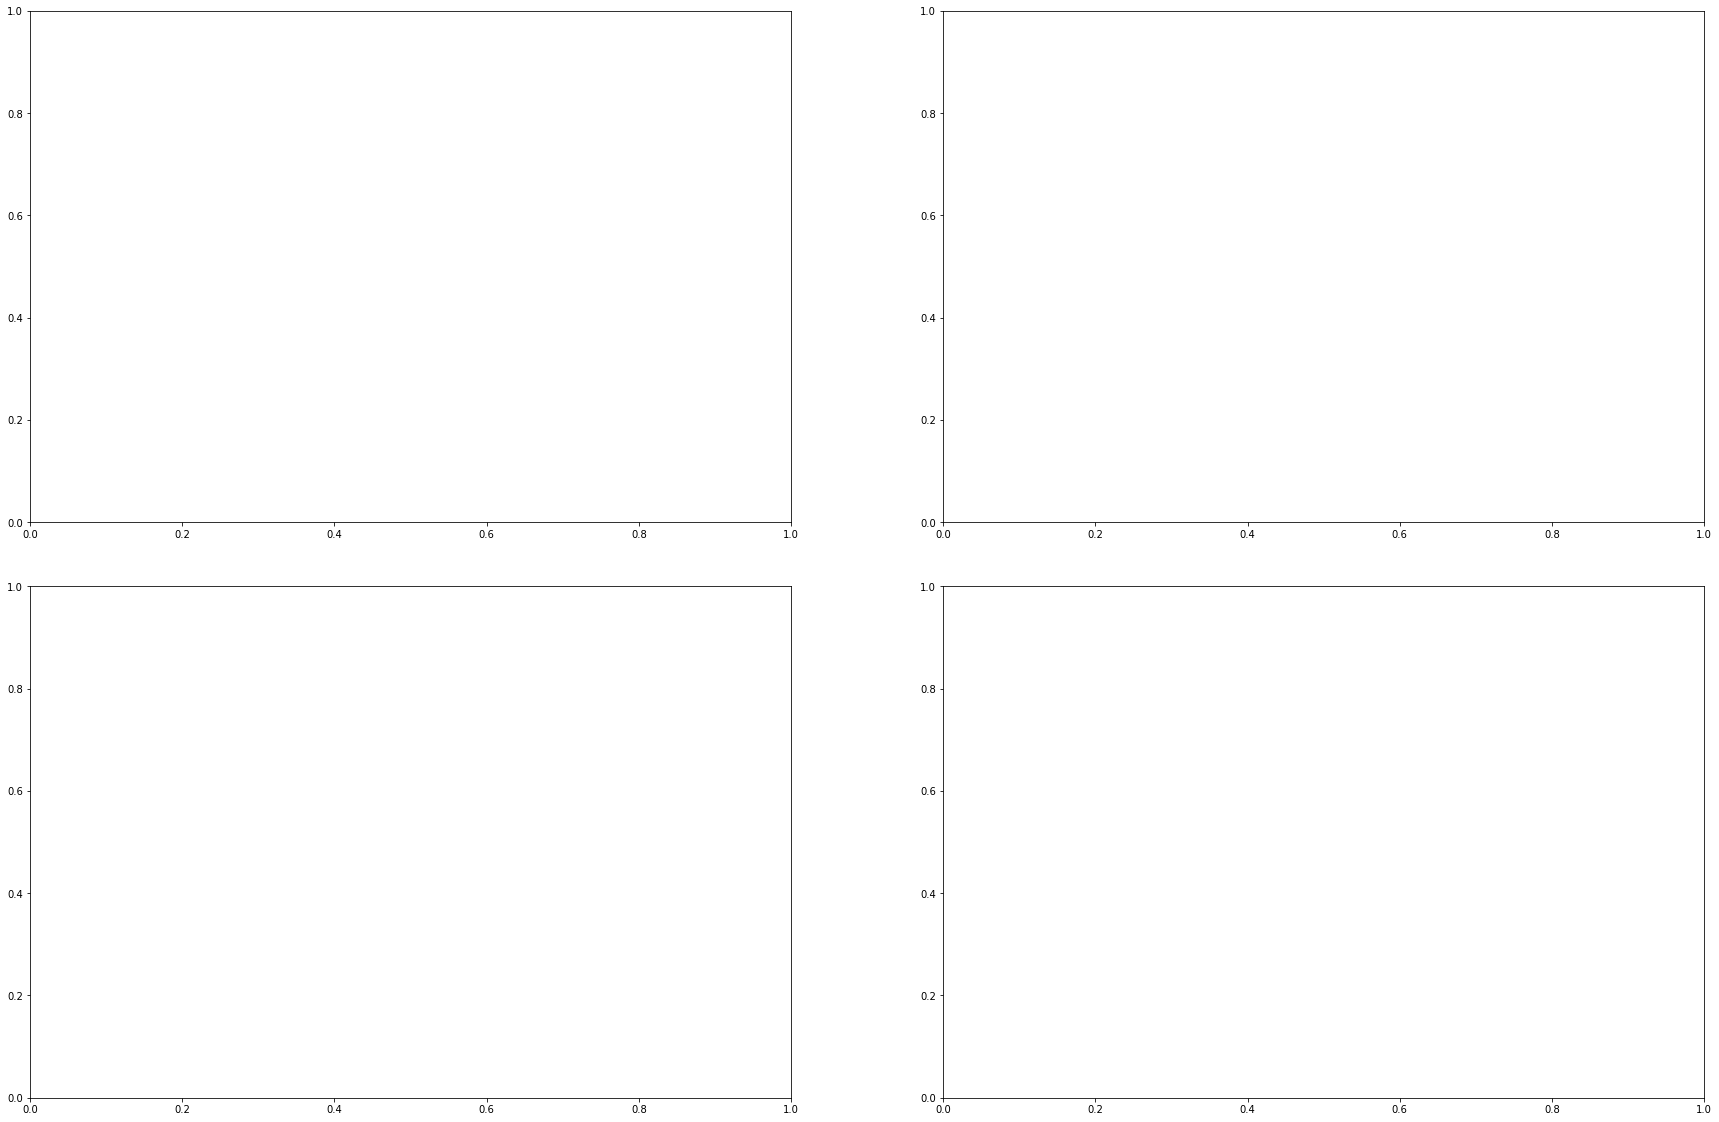

In [6]:
# post_MCMC_plots_and_print_statements(sampler, chain_plot_size, discard_n, thin_n, labels, data, sems, 
# fig_dimensions = (20, 30), wavelength)

discard_n = 3000
thin_n = 1

# Data and SEMs need to be flattened
MCMC_median_params = plotting.post_MCMC_plots_and_print_statements(reader, 
    discard_n, thin_n, labels, angles, data, stds, [wavelength], 
    "Linear_Polarizer", num_chains = 100, plot_MCMC_chains = False)